In [1]:
#!pip install  nbconvert[webpdf]
import nbconvert
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
excel_file = "PH_Data2.xlsx"  # Replace with the actual file path
sheet_name = "Data"
import matplotlib.pyplot as plt
# Read the data from the specified sheet into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)
df = df.fillna(method='ffill')

#print(df.head())
print(len(df))
date = df['Date']
print(df.columns)


72
Index(['Date', 'RGDP_sa', 'RINV_sa', 'RGCE_sa', 'RGovExp_sa', 'Rlend_sa',
       'REER_sa', 'Rrate', 'RNXG_sa', 'RNX_sa', 'RCAB_sa', 'RNXG_RGDP',
       'RNX_RGDP', 'RCAB_RGDP', 'RFFFund_1', 'RFFFund_2', 'RUSFFund',
       'FCPIsa_1', 'FCPIsa_2', 'Wcomm_sa', 'FGDPsa_1', 'FGDPsa_2', 'PGDP_sa',
       'CPI_sa', 'inflation', 'Rexpgd_sa', 'Rexp_sa', 'RCAcredit_sa', 'rate',
       'FFFund_1', 'FFFund_2', 'USFFund', 'Ginflation1', 'Ginflation2',
       'Wcomm_inflation', 'ExRet', 'CDS', 'RGCE_GDP', 'RGovExp_GDP',
       'GovBal_GDP', 'Debt_GDP', 'Stock_index', 'Rstock_index',
       'Rstock_index_cpi', 'RPCE_sa'],
      dtype='object')


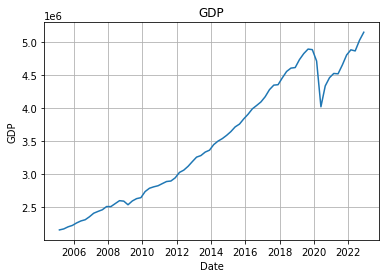

In [3]:
GDP = df['RGDP_sa']
GDP = np.array(GDP)
Inflation = df['inflation']
Inflation = np.array(Inflation)
plt.plot(date, GDP)
Rate = df['rate']
Rate = np.array(Rate)
WinfC = df['Wcomm_inflation']
WinfC = np.array(WinfC)
ExRet= df['ExRet']
ExRet  = np.array(ExRet)
plt.title('GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
#plt.legend('GDP')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Inflation')

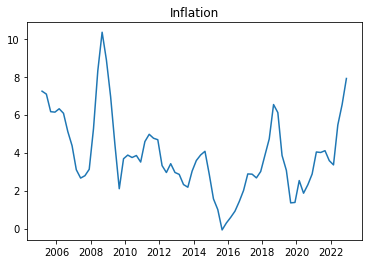

In [4]:
plt.plot(date, Inflation)
plt.title('Inflation')

In [5]:
ygrowth = np.log(GDP[5:]) - np.log(GDP[:-5])



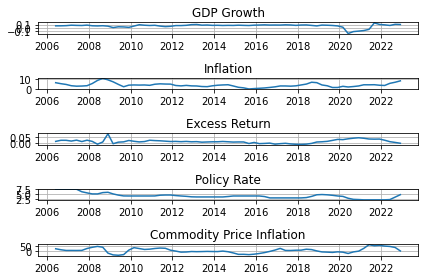

In [6]:
import matplotlib.pyplot as plt

# Create the first subplot (top)
plt.subplot(5, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(date[5:], ygrowth)
plt.title('GDP Growth')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range


# Create the second subplot (bottom)
plt.subplot(5, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], Inflation[5:])
plt.title('Inflation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,3)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], ExRet[5:])
plt.title('Excess Return')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,4)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], Rate[5:])
plt.title('Policy Rate')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,5)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], WinfC[5:])
plt.title('Commodity Price Inflation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range



# Adjust the layout to avoid overlap
plt.tight_layout()

plt.show()


In [7]:
import yfinance as yf
import pandas as pd

# Define the currency pair symbol




# Define the currency pair symbol (CNY/USD) and date range
currency_pair = "PHPUSD=X"  # Yahoo Finance symbol for CNY/USD
start_date = "2005-01-01"
end_date = "2023-01-01"

# Fetch historical data
ph_data = yf.download(currency_pair, start=start_date, end=end_date, progress=False)

# Reset the index to access date as a column
ph_data.reset_index(inplace=True)

In [8]:

import numpy as np

# Assuming your arrays are originally 1D arrays or lists
ygrowth = np.array(ygrowth).reshape(-1, 1)  # Convert to a column vector
Inflation = np.array(Inflation[5:]).reshape(-1, 1)
ExRet = np.array(ExRet[5:]).reshape(-1, 1)
Rate = np.array(Rate[5:]).reshape(-1, 1)
WinfC = np.array(WinfC[5:]).reshape(-1, 1)

# Now you can concatenate them along axis 1
X = np.concatenate((ygrowth, Inflation, ExRet, Rate, WinfC), axis=1)




In [9]:
Y = Inflation[5:]
X1 = X[:-5,:]

In [45]:
import statsmodels.api as sm

# Assuming you have your dependent variable y and independent variable(s) X
# Add a constant term to the independent variables
X11 = sm.add_constant(X1)
Ytrain = Y[1:55]
Xtrain = X11[1:55,:]
Xtrain_normalized  = (Xtrain-np.min(Xtrain))/(np.max(Xtrain)-np.min(Xtrain))
Ytest = Y[55:]
Xtest = X11[55:,:]
Xtest_normalized =  (Xtest-np.min(Xtrain))/(np.max(Xtrain)-np.min(Xtrain))

# Fit the OLS regression model
model = sm.OLS(Ytrain, Xtrain_normalized).fit()
forecast = model.predict(Xtest_normalized)
error_ols = Ytest[:,0] - forecast
RMSQ_ols = np.sqrt(np.mean(error_ols**2))
print(RMSQ_ols)

# Print the summary of the regression results
print(model.summary())
print(error_ols)


2.512705722000535
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     6.594
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           9.59e-05
Time:                        11:53:51   Log-Likelihood:                -100.19
No. Observations:                  54   AIC:                             212.4
Df Residuals:                      48   BIC:                             224.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           768.0875   2111.768  

In [44]:
print(error_ols.shape)
print(forecast.shape)
print(Ytest.shape)
print(Ytest[:,0] - forecast)

(7,)
(7,)
(7, 1)
[0.75668285 0.77035718 0.80831758 0.75191645 2.5172381  2.33617001
 5.47876606]


In [16]:
Xtrain_normalized1.shape

(54, 5)

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Generate random data for training


n_timesteps = 1
n_features = 4

Ytrain = Y[1:55]
Xtrain_normalized1 = Xtrain_normalized[:,1:]

Ytest = Y[55:]
Xtest_normalized1 = Xtest_normalized[:,1:]

n_samples = len(Ytrain)
n_timesteps = 1

nrows, ncols = Xtest_normalized1.shape

n_features = ncols

# Create a GRU network
model = Sequential()
#model.add(GRU(4, activation='tanh', input_shape=(n_timesteps, n_features)))
#model.add(Dense(1))  # Output layer
# Create an Elman Recurrent Network
model = Sequential()
model.add(SimpleRNN(units=8, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

Xtrain_normalized2 = Xtrain_normalized1.reshape(Xtrain_normalized1.shape[0],1,n_features)
# Train the model
model.fit(Xtrain_normalized2, Ytrain, epochs=500, batch_size=32)

# Generate new data for prediction (you can replace this with your own test data)

# Make predictions
Xtest_normalized2= Xtest_normalized1.reshape(Xtest_normalized1.shape[0], 1, Xtest_normalized1.shape[1])
predictions = model.predict(Xtest_normalized2)

error =  Ytest - predictions

print("Predictions:", predictions)


Epoch 1/500
2/2 [==============================] - 1s 5ms/step - loss: 19.5396
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 19.3743
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 19.2105
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 19.0416
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 18.8793
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 18.7159
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 18.5584
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 18.3939
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 18.2346
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 18.0782
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: 17.9208
Epoch 12/500
2/2 [==============================] - 0s 2ms/step - loss: 17.7646
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 2ms/step - loss: 6.9750
Epoch 104/500
2/2 [==============================] - 0s 2ms/step - loss: 6.9096
Epoch 105/500
2/2 [==============================] - 0s 2ms/step - loss: 6.8380
Epoch 106/500
2/2 [==============================] - 0s 2ms/step - loss: 6.7758
Epoch 107/500
2/2 [==============================] - 0s 997us/step - loss: 6.7069
Epoch 108/500
2/2 [==============================] - 0s 2ms/step - loss: 6.6480
Epoch 109/500
2/2 [==============================] - 0s 2ms/step - loss: 6.5854
Epoch 110/500
2/2 [==============================] - 0s 2ms/step - loss: 6.5208
Epoch 111/500
2/2 [==============================] - 0s 997us/step - loss: 6.4612
Epoch 112/500
2/2 [==============================] - 0s 3ms/step - loss: 6.4059
Epoch 113/500
2/2 [==============================] - 0s 2ms/step - loss: 6.3460
Epoch 114/500
2/2 [==============================] - 0s 2ms/step - loss: 6.2876
Epoch 115/500
2/2 [==============================]

2/2 [==============================] - 0s 3ms/step - loss: 4.0816
Epoch 206/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0771
Epoch 207/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0711
Epoch 208/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0650
Epoch 209/500
2/2 [==============================] - 0s 3ms/step - loss: 4.0610
Epoch 210/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0551
Epoch 211/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0512
Epoch 212/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0454
Epoch 213/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0411
Epoch 214/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0379
Epoch 215/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0323
Epoch 216/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0282
Epoch 217/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 3.9019
Epoch 308/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9016
Epoch 309/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9013
Epoch 310/500
2/2 [==============================] - 0s 998us/step - loss: 3.9013
Epoch 311/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9007
Epoch 312/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9003
Epoch 313/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9001
Epoch 314/500
2/2 [==============================] - 0s 997us/step - loss: 3.8997
Epoch 315/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8994
Epoch 316/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8991
Epoch 317/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8996
Epoch 318/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8985
Epoch 319/500
2/2 [==============================]

2/2 [==============================] - 0s 997us/step - loss: 3.8756
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8752
Epoch 411/500
2/2 [==============================] - 0s 997us/step - loss: 3.8753
Epoch 412/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8748
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8746
Epoch 414/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8744
Epoch 415/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8740
Epoch 416/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8737
Epoch 417/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8740
Epoch 418/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8734
Epoch 419/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8730
Epoch 420/500
2/2 [==============================] - 0s 2ms/step - loss: 3.8727
Epoch 421/500
2/2 [==============================]

In [19]:
rmsq_nn = np.sqrt(np.mean(error**2))


In [20]:
rmsq_nn


2.0149834874768797

In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate random data for training


n_timesteps = 1

# Ytrain = Y[1:55]
# Xtrain = X11[1:55,1:]
# Ytest = Y[55:]
# Xtest = X11[55:,1:]

# n_samples = len(Ytrain)
# n_timesteps = 1

# nrows, ncols = Xtest.shape

# n_features = ncols

# Create a GRU network
model = Sequential()
#model.add(GRU(4, activation='tanh', input_shape=(n_timesteps, n_features)))
#model.add(Dense(1))  # Output layer
# Create an Elman Recurrent Network
model = Sequential()
model.add(LSTM(units=4, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')


Xtrain_normalized2 = Xtrain_normalized1.reshape(Xtrain_normalized1.shape[0],1,n_features)
# Train the model
model.fit(Xtrain_normalized2, Ytrain, epochs=500, batch_size=32)

# Generate new data for prediction (you can replace this with your own test data)

# Make predictions
Xtest_normalized2= Xtest_normalized1.reshape(Xtest_normalized1.shape[0], 1, Xtest_normalized1.shape[1])
predictions = model.predict(Xtest_normalized2)

error =  Ytest - predictions

print("Predictions:", predictions)


Epoch 1/500
2/2 [==============================] - 1s 3ms/step - loss: 15.8661
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 15.8388
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 15.8095
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 15.7825
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 15.7535
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 15.7258
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 15.6978
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 15.6689
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 15.6409
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 15.6121
Epoch 11/500
2/2 [==============================] - 0s 3ms/step - loss: 15.5831
Epoch 12/500
2/2 [==============================] - 0s 2ms/step - loss: 15.5555
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 2ms/step - loss: 11.3003
Epoch 104/500
2/2 [==============================] - 0s 2ms/step - loss: 11.2302
Epoch 105/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1673
Epoch 106/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1004
Epoch 107/500
2/2 [==============================] - 0s 2ms/step - loss: 11.0332
Epoch 108/500
2/2 [==============================] - 0s 3ms/step - loss: 10.9697
Epoch 109/500
2/2 [==============================] - 0s 2ms/step - loss: 10.9003
Epoch 110/500
2/2 [==============================] - 0s 2ms/step - loss: 10.8348
Epoch 111/500
2/2 [==============================] - 0s 2ms/step - loss: 10.7704
Epoch 112/500
2/2 [==============================] - 0s 3ms/step - loss: 10.7083
Epoch 113/500
2/2 [==============================] - 0s 3ms/step - loss: 10.6399
Epoch 114/500
2/2 [==============================] - 0s 2ms/step - loss: 10.5765
Epoch 115/500
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 6.1940
Epoch 206/500
2/2 [==============================] - 0s 2ms/step - loss: 6.1625
Epoch 207/500
2/2 [==============================] - 0s 3ms/step - loss: 6.1363
Epoch 208/500
2/2 [==============================] - 0s 2ms/step - loss: 6.1056
Epoch 209/500
2/2 [==============================] - 0s 2ms/step - loss: 6.0793
Epoch 210/500
2/2 [==============================] - 0s 2ms/step - loss: 6.0478
Epoch 211/500
2/2 [==============================] - 0s 6ms/step - loss: 6.0201
Epoch 212/500
2/2 [==============================] - 0s 3ms/step - loss: 5.9953
Epoch 213/500
2/2 [==============================] - 0s 3ms/step - loss: 5.9654
Epoch 214/500
2/2 [==============================] - 0s 2ms/step - loss: 5.9383
Epoch 215/500
2/2 [==============================] - 0s 2ms/step - loss: 5.9127
Epoch 216/500
2/2 [==============================] - 0s 998us/step - loss: 5.8878
Epoch 217/500
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 4.4641
Epoch 308/500
2/2 [==============================] - 0s 2ms/step - loss: 4.4553
Epoch 309/500
2/2 [==============================] - 0s 3ms/step - loss: 4.4470
Epoch 310/500
2/2 [==============================] - 0s 2ms/step - loss: 4.4397
Epoch 311/500
2/2 [==============================] - 0s 2ms/step - loss: 4.4314
Epoch 312/500
2/2 [==============================] - 0s 3ms/step - loss: 4.4234
Epoch 313/500
2/2 [==============================] - 0s 4ms/step - loss: 4.4181
Epoch 314/500
2/2 [==============================] - 0s 2ms/step - loss: 4.4082
Epoch 315/500
2/2 [==============================] - 0s 3ms/step - loss: 4.4010
Epoch 316/500
2/2 [==============================] - 0s 2ms/step - loss: 4.3942
Epoch 317/500
2/2 [==============================] - 0s 2ms/step - loss: 4.3878
Epoch 318/500
2/2 [==============================] - 0s 3ms/step - loss: 4.3795
Epoch 319/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 4.0314
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0289
Epoch 411/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0272
Epoch 412/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0252
Epoch 413/500
2/2 [==============================] - 0s 4ms/step - loss: 4.0239
Epoch 414/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0227
Epoch 415/500
2/2 [==============================] - 0s 997us/step - loss: 4.0204
Epoch 416/500
2/2 [==============================] - 0s 3ms/step - loss: 4.0189
Epoch 417/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0168
Epoch 418/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0161
Epoch 419/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0138
Epoch 420/500
2/2 [==============================] - 0s 3ms/step - loss: 4.0121
Epoch 421/500
2/2 [==============================] -

In [23]:
rmsq_lstm = np.sqrt(np.mean(error**2))

In [24]:
print(rmsq_lstm)

2.178219551468653


In [28]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Generate random data for training


n_timesteps = 1
n_features = 4

Ytrain = Y[1:55]
Xtrain = X11[1:55,1:]
Ytest = Y[55:]
Xtest = X11[55:,1:]

n_samples = len(Ytrain)
n_timesteps = 1

nrows, ncols = Xtest.shape

n_features = ncols

# Create a GRU network
model = Sequential()
#model.add(GRU(4, activation='tanh', input_shape=(n_timesteps, n_features)))
#model.add(Dense(1))  # Output layer
# Create an Elman Recurrent Network
model = Sequential()
model.add(GRU(units=4, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')



Xtrain_normalized2 = Xtrain_normalized1.reshape(Xtrain_normalized1.shape[0],1,n_features)
# Train the model
model.fit(Xtrain_normalized2, Ytrain, epochs=1000, batch_size=32)

# Generate new data for prediction (you can replace this with your own test data)

# Make predictions
Xtest_normalized2= Xtest_normalized1.reshape(Xtest_normalized1.shape[0], 1, Xtest_normalized1.shape[1])
predictions = model.predict(Xtest_normalized2)

error =  Ytest - predictions

print("Predictions:", predictions)


Epoch 1/1000
2/2 [==============================] - 1s 4ms/step - loss: 16.9262
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 16.8317
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 16.7380
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 16.6390
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 16.5460
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 16.4531
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 16.3595
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 16.2637
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 16.1665
Epoch 10/1000
2/2 [==============================] - 0s 2ms/step - loss: 16.0749
Epoch 11/1000
2/2 [==============================] - 0s 2ms/step - loss: 15.9816
Epoch 12/1000
2/2 [==============================] - 0s 2ms/step - loss: 15.8879
Epoch 13/1000
2/2 [==================

2/2 [==============================] - 0s 2ms/step - loss: 8.1239
Epoch 103/1000
2/2 [==============================] - 0s 2ms/step - loss: 8.0544
Epoch 104/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.9807
Epoch 105/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.9126
Epoch 106/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.8407
Epoch 107/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.7847
Epoch 108/1000
2/2 [==============================] - 0s 4ms/step - loss: 7.7110
Epoch 109/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.6462
Epoch 110/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.5806
Epoch 111/1000
2/2 [==============================] - 0s 3ms/step - loss: 7.5191
Epoch 112/1000
2/2 [==============================] - 0s 2ms/step - loss: 7.4508
Epoch 113/1000
2/2 [==============================] - 0s 3ms/step - loss: 7.3892
Epoch 114/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 4.3544
Epoch 204/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.3435
Epoch 205/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.3303
Epoch 206/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.3214
Epoch 207/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.3109
Epoch 208/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.3028
Epoch 209/1000
2/2 [==============================] - 0s 4ms/step - loss: 4.2905
Epoch 210/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.2808
Epoch 211/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.2713
Epoch 212/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.2638
Epoch 213/1000
2/2 [==============================] - 0s 3ms/step - loss: 4.2530
Epoch 214/1000
2/2 [==============================] - 0s 2ms/step - loss: 4.2440
Epoch 215/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 3.9673
Epoch 305/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9667
Epoch 306/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9662
Epoch 307/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9666
Epoch 308/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.9652
Epoch 309/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9649
Epoch 310/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9641
Epoch 311/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.9638
Epoch 312/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9638
Epoch 313/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9629
Epoch 314/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9625
Epoch 315/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9623
Epoch 316/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 3.9448
Epoch 406/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9446
Epoch 407/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.9448
Epoch 408/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9443
Epoch 409/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9442
Epoch 410/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9440
Epoch 411/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9439
Epoch 412/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9437
Epoch 413/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9435
Epoch 414/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9434
Epoch 415/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9433
Epoch 416/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9430
Epoch 417/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 3.9289
Epoch 507/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9286
Epoch 508/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9285
Epoch 509/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9284
Epoch 510/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9282
Epoch 511/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9281
Epoch 512/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9281
Epoch 513/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9276
Epoch 514/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9275
Epoch 515/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9274
Epoch 516/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9273
Epoch 517/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9270
Epoch 518/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 3.9110
Epoch 608/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9108
Epoch 609/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9107
Epoch 610/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9104
Epoch 611/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9103
Epoch 612/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9100
Epoch 613/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9099
Epoch 614/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9096
Epoch 615/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9098
Epoch 616/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9092
Epoch 617/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9097
Epoch 618/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9088
Epoch 619/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 3.8907
Epoch 709/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8904
Epoch 710/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8900
Epoch 711/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8898
Epoch 712/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8894
Epoch 713/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8894
Epoch 714/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8890
Epoch 715/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8891
Epoch 716/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.8886
Epoch 717/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8883
Epoch 718/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8881
Epoch 719/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8879
Epoch 720/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 3.8675
Epoch 810/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8672
Epoch 811/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8669
Epoch 812/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8668
Epoch 813/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8664
Epoch 814/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8662
Epoch 815/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8659
Epoch 816/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8661
Epoch 817/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8655
Epoch 818/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8651
Epoch 819/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8659
Epoch 820/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8646
Epoch 821/1000
2/2 [=======================

2/2 [==============================] - 0s 2ms/step - loss: 3.8423
Epoch 911/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8420
Epoch 912/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8418
Epoch 913/1000
2/2 [==============================] - 0s 997us/step - loss: 3.8417
Epoch 914/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8415
Epoch 915/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8411
Epoch 916/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8410
Epoch 917/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8414
Epoch 918/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.8403
Epoch 919/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8408
Epoch 920/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8399
Epoch 921/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8395
Epoch 922/1000
2/2 [=====================

In [29]:
rmsq_gru = np.sqrt(np.mean(error**2))

In [30]:
print(rmsq_gru)

1.9174532454698503
